## Table of content

In [ ]:
## Table of content
#Introduction
#Dataset Source
#Dataset Details
#Dataset Features
#Target Feature
#Goals and Objectives
#Data Cleaning and Preprocessing
#Data Exploration and Visualisation
#Summary and Conclusion
#References

In [3]:
#introduction

In [4]:
#Dataset source

In [5]:
#dataset details

In [6]:
#dataset retrival

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scanpy as sp
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###


In [7]:
## name of dataset to be imported from github account.
##df_name= 'StarWars.csv'
#starwar= 'starwars.csv'
starwar=pd.read_csv('StarWars.csv',encoding='latin-1' )

In [8]:
#df_url='https://github.com/prashantt777/Machine-learning-Phase-1/blob/main/StarWars.csv'
#url_content= requests.get(df_url, verify=False).content
#starwar= pd.read_csv(io.StringIO(url_content.decode('utf-8')))
#df_data=pd.read_csv(df_url,index_col=0)
#df_data.head(5)

In [9]:
starwar.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [11]:
#dataset feature

In [12]:
starwar.nunique()

RespondentID                                                                                                                                     1186
Have you seen any of the 6 films in the Star Wars franchise?                                                                                        4
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                               5
Which of the following Star Wars films have you seen? Please select all that apply.                                                                 1
Unnamed: 4                                                                                                                                          1
Unnamed: 5                                                                                                                                          1
Unnamed: 6                                                                                          

In [15]:
starwar.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.' : 'W1',#watched movie 1
                        'Unnamed: 4' : 'W2',#watched movie 2
                        'Unnamed: 5' : 'W3',#watched movie 3
                        'Unnamed: 6' : 'W4',#watched movie 4
                        'Unnamed: 7' : 'W5',#watched movie 5
                        'Unnamed: 8' : 'W6',#watched movie 6
                        'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'R1', #Ranked movie 1
                        'Unnamed: 10' : 'R2',#Ranked movie 2
                        'Unnamed: 11' : 'R3',#Ranked movie 3
                        'Unnamed: 12' : 'R4',#Ranked movie 4
                        'Unnamed: 13' : 'R5',#Ranked movie 5
                        'Unnamed: 14' : 'R6',#Ranked movie 6
                        'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.' : 'F_Han Solo',#familiarity with the charecter Han solo
                        'Unnamed: 16' : 'F_Luke Skywalker',# Familiarity with the charecter Luke skywalker
                        'Unnamed: 17' : 'F_Princess Leia Organa',# familiarity with the charecter princess leia                   
                        'Unnamed: 18' : 'F_Anakin Skywalker',# familiarity with the charecter Anakin Skywalker 
                        'Unnamed: 19' : 'F_Obi Wan Kenobi',# familiarity with the charecter Obi Wan Kenobi 
                        'Unnamed: 20' : 'F_Emperor Palpatine',# familiarity with the charecter Emperor Palpatine 
                        'Unnamed: 21' : 'F_Darth Vader',# familiarity with the charecter Darth Vader 
                        'Unnamed: 22' : 'F_Lando Calrissian',# familiarity with the charecter Lando Calrissian 
                        'Unnamed: 23' : 'F_Boba Fett',# familiarity with the charecter Boba Fett 
                        'Unnamed: 24' : 'F_C-3P0',# familiarity with the charecter C-3P0 
                        'Unnamed: 25' : 'F_R2 D2',# familiarity with the charecter R2 D2 
                        'Unnamed: 26' : 'F_Jar Jar Binks',# familiarity with the charecter Jar Jar Binks 
                        'Unnamed: 27' : 'F_Padme Amidala',# familiarity with the charecter Padme Amidala 
                        'Unnamed: 28' : 'F_Yoda'},inplace = True)# familiarity with the charecter Yoda 

In [16]:
starwar.nunique()

RespondentID                                                             1186
Have you seen any of the 6 films in the Star Wars franchise?                4
Do you consider yourself to be a fan of the Star Wars film franchise?       5
W1                                                                          1
W2                                                                          1
W3                                                                          1
W4                                                                          1
W5                                                                          1
W6                                                                          1
R1                                                                          7
R2                                                                          7
R3                                                                          7
R4                                                              

In [17]:
starwar.drop([0],inplace = True)

In [18]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes     935
No      250
Yes       1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [19]:
#Check data types
starwar.dtypes

RespondentID                                                             float64
Have you seen any of the 6 films in the Star Wars franchise?              object
Do you consider yourself to be a fan of the Star Wars film franchise?     object
W1                                                                        object
W2                                                                        object
W3                                                                        object
W4                                                                        object
W5                                                                        object
W6                                                                        object
R1                                                                        object
R2                                                                        object
R3                                                                        object
R4                          

In [20]:
#uppercase and lower case
starwar[(starwar.select_dtypes(['object'])).columns] = starwar.select_dtypes(['object']).apply(lambda x: x.str.upper())

In [21]:
#extra whitespace
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()


YES     935
NO      250
YES       1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [22]:
starwar[(starwar.select_dtypes(['object'])).columns] = starwar.select_dtypes(['object']).apply(lambda x: x.str.strip())

In [23]:
starwar['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

YES    936
NO     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [24]:
#typos
for col in starwar.columns[1:]:
    print(starwar[col].value_counts())

YES    936
NO     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
YES     551
NO      283
YESS      1
NOO       1
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
STAR WARS: EPISODE I  THE PHANTOM MENACE    673
Name: W1, dtype: int64
STAR WARS: EPISODE II  ATTACK OF THE CLONES    571
Name: W2, dtype: int64
STAR WARS: EPISODE III  REVENGE OF THE SITH    550
Name: W3, dtype: int64
STAR WARS: EPISODE IV  A NEW HOPE    607
Name: W4, dtype: int64
STAR WARS: EPISODE V THE EMPIRE STRIKES BACK    758
Name: W5, dtype: int64
STAR WARS: EPISODE VI RETURN OF THE JEDI    738
Name: W6, dtype: int64
4    237
6    168
3    130
1    129
5    100
2     71
Name: R1, dtype: int64
5    300
4    183
2    116
3    103
6    102
1     32
Name: R2, dtype: int64
6    217
5    203
4    182
3    150
2     47
1     36
Name: R3, dtype: int64
1    204
6    161
2    135
4    130
3    127
5     79
Name: R4, dtype: int64
1    289
2    235
5   

In [25]:
starwar['Are you familiar with the Expanded Universe?'].value_counts()

NO     615
YES    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [26]:
starwar['Do you consider yourself to be a fan of the Expanded Universe?\x8cæ'].value_counts()

NO      114
YES      98
YESS      1
Name: Do you consider yourself to be a fan of the Expanded Universe?æ, dtype: int64

In [50]:
typos = {'YESS': 'Y',    
         'NOO':'N',  
         'F':'FEMALE'}
starwar[(starwar.select_dtypes(['object'])).columns] = starwar.select_dtypes(['object']).apply(lambda x: x.replace(typos))

In [29]:
starwar.rename({'Do you consider yourself to be a fan of the Expanded Universe?\x8cæ' : 'Do you consider yourself to be a fan of the Expanded Universe?'},inplace = True)

In [30]:
starwar.dtypes

RespondentID                                                             float64
Have you seen any of the 6 films in the Star Wars franchise?              object
Do you consider yourself to be a fan of the Star Wars film franchise?     object
W1                                                                        object
W2                                                                        object
W3                                                                        object
W4                                                                        object
W5                                                                        object
W6                                                                        object
R1                                                                        object
R2                                                                        object
R3                                                                        object
R4                          

In [31]:
for col in starwar.columns[1:]:
    print(starwar[col].value_counts())
    print()  

YES    936
NO     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

YES    552
NO     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

STAR WARS: EPISODE I  THE PHANTOM MENACE    673
Name: W1, dtype: int64

STAR WARS: EPISODE II  ATTACK OF THE CLONES    571
Name: W2, dtype: int64

STAR WARS: EPISODE III  REVENGE OF THE SITH    550
Name: W3, dtype: int64

STAR WARS: EPISODE IV  A NEW HOPE    607
Name: W4, dtype: int64

STAR WARS: EPISODE V THE EMPIRE STRIKES BACK    758
Name: W5, dtype: int64

STAR WARS: EPISODE VI RETURN OF THE JEDI    738
Name: W6, dtype: int64

4    237
6    168
3    130
1    129
5    100
2     71
Name: R1, dtype: int64

5    300
4    183
2    116
3    103
6    102
1     32
Name: R2, dtype: int64

6    217
5    203
4    182
3    150
2     47
1     36
Name: R3, dtype: int64

1    204
6    161
2    135
4    130
3    127
5     79
Name: R4, dtype: int64

1    289
2    235
5    118
3    106


In [32]:
#Sanity check
starwar['Age'].value_counts()

# as you can see age of a person is showing 500.


45-60    291
> 60     269
30-44    268
18-29    217
500        1
Name: Age, dtype: int64

In [33]:
starwar['Age'].replace('500','60-70',inplace = True)

In [34]:
starwar['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    217
60-70      1
Name: Age, dtype: int64

In [35]:
##Missing values
starwar.isnull().sum()


RespondentID                                                               0
Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?    350
W1                                                                       513
W2                                                                       615
W3                                                                       636
W4                                                                       579
W5                                                                       428
W6                                                                       448
R1                                                                       351
R2                                                                       350
R3                                                                       351
R4                                                                       350

In [36]:
#from column watched\movie1 to watched\movie6 assigning value true for movies watched and assigning value false to movies not watched.
for col in 'W1','W2','W3','W4','W5','W6':
    starwar[col] = ~starwar[col].isna()
starwar.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,W1,W2,W3,W4,W5,W6,R1,R2,R3,R4,R5,R6,F_Han Solo,F_Luke Skywalker,F_Princess Leia Organa,F_Anakin Skywalker,F_Obi Wan Kenobi,F_Emperor Palpatine,F_Darth Vader,F_Lando Calrissian,F_Boba Fett,F_C-3P0,F_R2 D2,F_Jar Jar Binks,F_Padme Amidala,F_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,YES,YES,True,True,True,True,True,True,3,2,1,4,5,6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,UNFAMILIAR (N/A),UNFAMILIAR (N/A),VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,YES,NO,NO,MALE,18-29,NaN,HIGH SCHOOL DEGREE,SOUTH ATLANTIC
2,3.292880e+09,NO,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,MALE,18-29,"$0 - $24,999",BACHELOR DEGREE,WEST SOUTH CENTRAL
3,3.292765e+09,YES,NO,True,True,True,False,False,False,1,2,3,4,5,6,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),UNFAMILIAR (N/A),I DON'T UNDERSTAND THIS QUESTION,NO,NaN,NO,MALE,18-29,"$0 - $24,999",HIGH SCHOOL DEGREE,WEST NORTH CENTRAL
4,3.292763e+09,YES,YES,True,True,True,True,True,True,5,6,1,2,4,3,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,I DON'T UNDERSTAND THIS QUESTION,NO,NaN,YES,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
5,3.292731e+09,YES,YES,True,True,True,True,True,True,5,4,6,2,1,3,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL


In [37]:
#now checking the missing values again
#rank will have missing values as some people did not watch all the 6 movies and thus they did not rank all of them, if we remove those missing values a lot of data will be lost.
starwar.isnull().sum()

RespondentID                                                               0
Have you seen any of the 6 films in the Star Wars franchise?               0
Do you consider yourself to be a fan of the Star Wars film franchise?    350
W1                                                                         0
W2                                                                         0
W3                                                                         0
W4                                                                         0
W5                                                                         0
W6                                                                         0
R1                                                                       351
R2                                                                       350
R3                                                                       351
R4                                                                       350

In [44]:
## Removing the nan in 'respondent ID' variable since it is having unique values. We only need rows in which 'respondent ID' is not null
starwar.isnull().sum()
starwar = starwar[pd.notnull(starwar['Have you seen any of the 6 films in the Star Wars franchise?'])]
starwar = starwar[pd.notnull(starwar['Do you consider yourself to be a fan of the Star Wars film franchise?'])]
#starwar = starwar[pd.notnull(starwar['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'])]
#starwar = starwar[pd.notnull(starwar['R2'])]
#starwar = starwar[pd.notnull(starwar['R3'])]
#starwar = starwar[pd.notnull(starwar['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'])]
starwar = starwar[pd.notnull(starwar['F_Luke Skywalker'])]
starwar = starwar[pd.notnull(starwar['F_Princess Leia Organa'])]
starwar = starwar[pd.notnull(starwar['F_Anakin Skywalker'])]
starwar = starwar[pd.notnull(starwar['F_Obi Wan Kenobi'])]
starwar = starwar[pd.notnull(starwar['F_Emperor Palpatine'])]
starwar = starwar[pd.notnull(starwar['F_Darth Vader'])]
starwar = starwar[pd.notnull(starwar['F_Lando Calrissian'])]
starwar = starwar[pd.notnull(starwar['F_Boba Fett'])]
starwar = starwar[pd.notnull(starwar['F_C-3P0'])]
starwar = starwar[pd.notnull(starwar['F_R2 D2'])]
starwar = starwar[pd.notnull(starwar['F_Jar Jar Binks'])]
starwar = starwar[pd.notnull(starwar['F_Padme Amidala'])]
starwar = starwar[pd.notnull(starwar['F_Yoda'])]
starwar = starwar[pd.notnull(starwar['Do you consider yourself to be a fan of the Expanded Universe?æ'])]
starwar = starwar[pd.notnull(starwar['Household Income'])]
starwar = starwar[pd.notnull(starwar['Education'])]
starwar = starwar[pd.notnull(starwar['Location (Census Region)'])]
print(starwar.isnull().sum())

RespondentID                                                             0
Have you seen any of the 6 films in the Star Wars franchise?             0
Do you consider yourself to be a fan of the Star Wars film franchise?    0
W1                                                                       0
W2                                                                       0
W3                                                                       0
W4                                                                       0
W5                                                                       0
W6                                                                       0
R1                                                                       0
R2                                                                       0
R3                                                                       0
R4                                                                       0
R5                       

In [45]:
#now removing Nan values from people demographics.(now check if we want to show the sum of nan values or the head after removing nan values)
star_people= starwar[starwar.columns[15:]]
star_people.head()

,F_Han Solo,F_Luke Skywalker,F_Princess Leia Organa,F_Anakin Skywalker,F_Obi Wan Kenobi,F_Emperor Palpatine,F_Darth Vader,F_Lando Calrissian,F_Boba Fett,F_C-3P0,F_R2 D2,F_Jar Jar Binks,F_Padme Amidala,F_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,HAN,YES,NO,YES,MALE,18-29,"$25,000 - $49,999",BACHELOR DEGREE,MIDDLE ATLANTIC
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,HAN,YES,YES,YES,MALE,18-29,"$0 - $24,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST SOUTH CENTRAL
17,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT UNFAVORABLY,VERY UNFAVORABLY,HAN,YES,YES,NO,MALE,18-29,"$50,000 - $99,999",BACHELOR DEGREE,NEW ENGLAND
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,GREEDO,YES,YES,YES,MALE,18-29,"$50,000 - $99,999",BACHELOR DEGREE,SOUTH ATLANTIC


In [46]:
star_people.isna().sum()


F_Han Solo                                                          0
F_Luke Skywalker                                                    0
F_Princess Leia Organa                                              0
F_Anakin Skywalker                                                  0
F_Obi Wan Kenobi                                                    0
F_Emperor Palpatine                                                 0
F_Darth Vader                                                       0
F_Lando Calrissian                                                  0
F_Boba Fett                                                         0
F_C-3P0                                                             0
F_R2 D2                                                             0
F_Jar Jar Binks                                                     0
F_Padme Amidala                                                     0
F_Yoda                                                              0
Which character shot

In [47]:
star_people.dropna(inplace = True)
star_people.head()

,F_Han Solo,F_Luke Skywalker,F_Princess Leia Organa,F_Anakin Skywalker,F_Obi Wan Kenobi,F_Emperor Palpatine,F_Darth Vader,F_Lando Calrissian,F_Boba Fett,F_C-3P0,F_R2 D2,F_Jar Jar Binks,F_Padme Amidala,F_Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,GREEDO,YES,NO,NO,MALE,18-29,"$100,000 - $149,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST NORTH CENTRAL
6,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,HAN,YES,NO,YES,MALE,18-29,"$25,000 - $49,999",BACHELOR DEGREE,MIDDLE ATLANTIC
16,VERY FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT FAVORABLY,VERY FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,HAN,YES,YES,YES,MALE,18-29,"$0 - $24,999",SOME COLLEGE OR ASSOCIATE DEGREE,WEST SOUTH CENTRAL
17,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),SOMEWHAT UNFAVORABLY,VERY UNFAVORABLY,HAN,YES,YES,NO,MALE,18-29,"$50,000 - $99,999",BACHELOR DEGREE,NEW ENGLAND
23,VERY FAVORABLY,VERY FAVORABLY,VERY FAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,VERY UNFAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT FAVORABLY,SOMEWHAT UNFAVORABLY,VERY FAVORABLY,VERY FAVORABLY,VERY UNFAVORABLY,NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL),VERY FAVORABLY,GREEDO,YES,YES,YES,MALE,18-29,"$50,000 - $99,999",BACHELOR DEGREE,SOUTH ATLANTIC


In [48]:
star_people.isna().sum()

F_Han Solo                                                          0
F_Luke Skywalker                                                    0
F_Princess Leia Organa                                              0
F_Anakin Skywalker                                                  0
F_Obi Wan Kenobi                                                    0
F_Emperor Palpatine                                                 0
F_Darth Vader                                                       0
F_Lando Calrissian                                                  0
F_Boba Fett                                                         0
F_C-3P0                                                             0
F_R2 D2                                                             0
F_Jar Jar Binks                                                     0
F_Padme Amidala                                                     0
F_Yoda                                                              0
Which character shot

In [ ]:
#Data visualization.

             MALE FEMALE
R1  4.763560e+105    NaN
R2  4.131080e+105    NaN
R3  5.881903e+105    NaN
R4  2.438261e+105    NaN
R5  1.402899e+105    NaN
R6  2.987235e+105    NaN


[Text(0, 0, 'Episode I The Phantom Menace'),
 Text(1, 0, 'Star Wars: Episode II Attack of the Clones'),
 Text(2, 0, 'Star Wars: Episode III Revenge of the Sith'),
 Text(3, 0, 'Star Wars: Episode IV A New Hope'),
 Text(4, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(5, 0, 'Star Wars: Episode VI Return of the Jedi')]

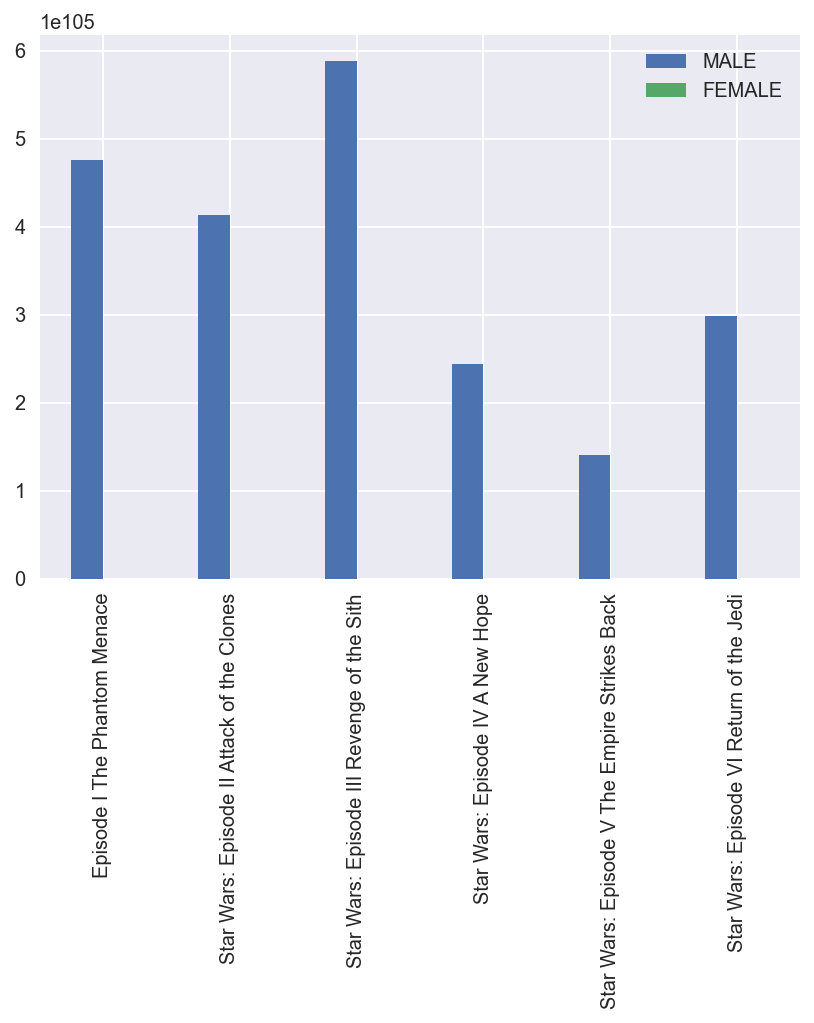

In [53]:
males = starwar[starwar["Gender"] == "MALE"]
females = starwar[starwar["Gender"] == "FEMALE" ]

ranked_by_gender = pd.DataFrame({'MALE':males[males.columns[9:15]].mean(),
                              'FEMALE':females[females.columns[9:15]].mean()})
print(ranked_by_gender)


fig = plt.figure(figsize=(15, 5))
s1 = fig.add_subplot(1, 2, 1)
s1 = ranked_by_gender.plot(kind = 'bar' ,ax=s1)
s1.set_xticklabels(['Episode I The Phantom Menace','Star Wars: Episode II Attack of the Clones','Star Wars: Episode III Revenge of the Sith','Star Wars: Episode IV A New Hope','Star Wars: Episode V The Empire Strikes Back',
                'Star Wars: Episode VI Return of the Jedi'])

In [54]:
# converting string type to float type for ranking columns.
starwar[starwar.columns[9:15]] = starwar[starwar.columns[9:15]].astype(float)
starwar[starwar.columns[9:15]].dtypes

R1    float64
R2    float64
R3    float64
R4    float64
R5    float64
R6    float64
dtype: object

6.0    54
4.0    38
5.0    30
1.0    21
3.0     9
2.0     6
Name: R1, dtype: int64
5.0    59
4.0    31
6.0    29
2.0    20
3.0    13
1.0     6
Name: R2, dtype: int64
4.0    42
5.0    37
3.0    34
6.0    26
2.0    12
1.0     7
Name: R3, dtype: int64
2.0    40
1.0    38
3.0    29
6.0    26
4.0    19
5.0     6
Name: R4, dtype: int64
1.0    65
2.0    42
3.0    20
5.0    19
4.0     8
6.0     4
Name: R5, dtype: int64
3.0    53
2.0    38
1.0    21
4.0    20
6.0    19
5.0     7
Name: R6, dtype: int64
               R1          R2          R3          R4          R5          R6
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000
mean     4.341772    4.291139    4.063291    2.955696    2.278481    3.069620
std      1.692141    1.402018    1.348193    1.727798    1.471052    1.472106
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      4.000000    4.000000    3.000000    2.000000    1.000000    2.000000
50%      5.000000    5.000000    4

[Text(0, 0, 'Episode I The Phantom Menace'),
 Text(1, 0, 'Star Wars: Episode II Attack of the Clones'),
 Text(2, 0, 'Star Wars: Episode III Revenge of the Sith'),
 Text(3, 0, 'Star Wars: Episode IV A New Hope'),
 Text(4, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(5, 0, 'Star Wars: Episode VI Return of the Jedi')]

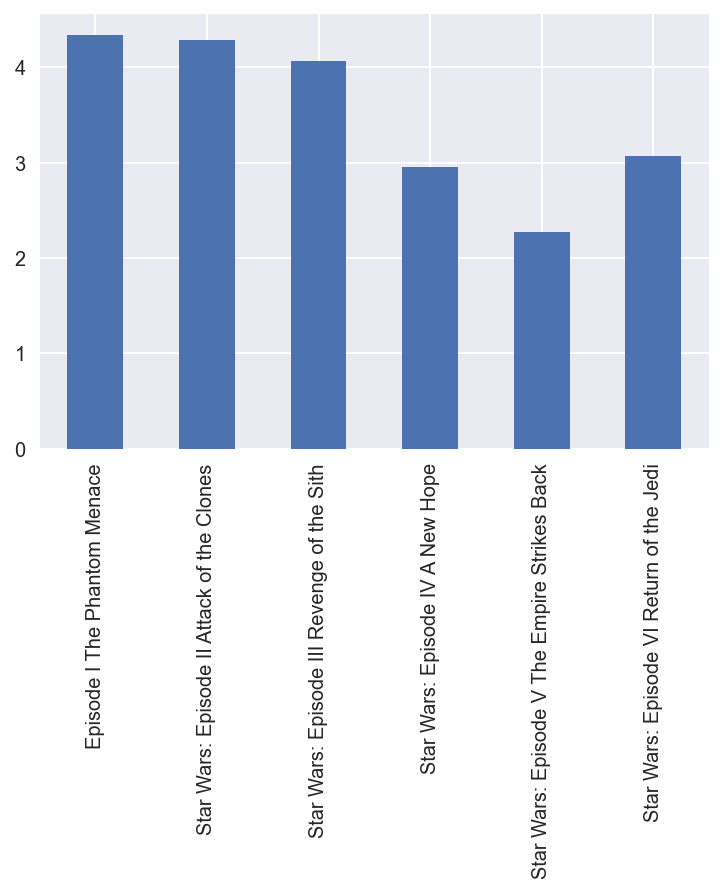

In [55]:
#plotting rank of each films 
starwar.describe()
print(starwar['R1'].value_counts())
print(starwar['R2'].value_counts())
print(starwar['R3'].value_counts())
print(starwar['R4'].value_counts())
print(starwar['R5'].value_counts())
print(starwar['R6'].value_counts())


print(starwar[starwar.columns[9:15]].describe())

import matplotlib.pyplot as plt
%matplotlib inline
fig, s_1= plt.subplots()
s_1 = starwar[starwar.columns[9:15]].mean().plot(kind = 'bar')
s_1.set_xticklabels(['Episode I The Phantom Menace','Star Wars: Episode II Attack of the Clones','Star Wars: Episode III Revenge of the Sith','Star Wars: Episode IV A New Hope','Star Wars: Episode V The Empire Strikes Back',
                'Star Wars: Episode VI Return of the Jedi'])
